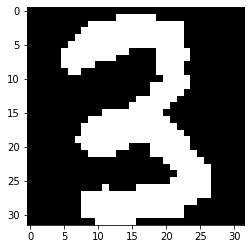

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_file(filename):
    data = []
    with open(filename, "r") as f:
        for i in range(21):
            f.readline()
        while True:
            line = f.readline().strip()
            if not line:
                break
            for i in range(31):
                line += f.readline().strip()
            line = [int(i) for i in line]
            if int(f.readline().strip()) == 3:
                data.append(line)
    return data

data = load_file("optdigits-orig.tra") + \
       load_file("optdigits-orig.wdep") + \
       load_file("optdigits-orig.windep")
data = np.array(data).astype(np.float32) # shape=(487, 1024)

plt.imshow(data[0].reshape(32, 32), cmap='gray')
plt.show()

error = 185.52393


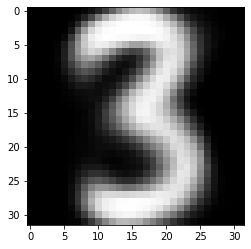

In [2]:
m = data.mean(axis=0, keepdims=True)
X = (data - m).T # shape=(1024, 487)

H = X.T @ X # shape=(487, 487)
w, U = np.linalg.eig(H)
S = np.diag(np.sqrt(w))
V = (np.linalg.inv(U @ S) @ X.T).T

V_ = V[:, :2]
X_ = V_.T @ X

print("error =", np.linalg.norm(V_ @ X_ - X))
plt.imshow((V_ @ X_ + m.T)[:, 0].reshape(32, 32), cmap='gray')
plt.show()

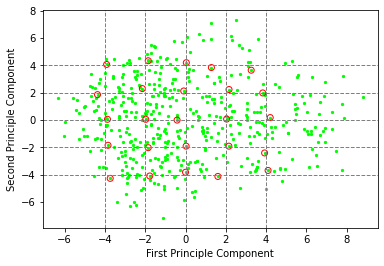

In [3]:
def get_focus(x, y, axv, axh):
    focus = []
    for v in axv:
        for h in axh:
            best = 0
            for i in range(x.size):
                if pow((x[i] - v), 2) + pow((y[i] - h), 2) < pow((x[best] - v), 2) + pow((y[best] - h), 2):
                    best = i
            focus.append(best)
    return focus

def plot(x, y, axv, axh, focus):
    plt.xlabel('First Principle Component')
    plt.ylabel('Second Principle Component')   
    for v in axv:
        plt.axvline(x=v,color="grey",ls="--",lw=1)
    for h in axh:
        plt.axhline(y=h,color="grey",ls="--",lw=1)
    plt.scatter(x, y, color='lime', s=5)
    
    fx, fy = [x[i] for i in focus], [y[i] for i in focus]
    plt.scatter(fx, fy, color='none', marker='o', edgecolor='red')
    plt.show()

axv = np.linspace(-4, 4, 5, endpoint=True)
axh = np.linspace(-4., 4., 5, endpoint=True)
focus = get_focus(X_[0], X_[1], axv, axh)
plot(X_[0], X_[1], axv, axh, focus)

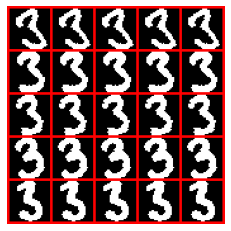

In [19]:
padding = 2
L = 32 * 5 + padding * 6
canvas = np.zeros((L, L, 3))
canvas[:, :, 0] = np.ones((L, L))

idx = 0
for i in range(5):
    x = padding * (i + 1) + i * 32
    for j in range(5):
        y = padding * (j + 1) + j * 32
        img = data[focus[i]].reshape(32, 32)
        img = np.stack((img, img, img), axis=-1)
        canvas[x: x + 32, y: y + 32] = img
        
plt.axis('off')
plt.imshow(canvas)
plt.show()